## This notebook illustrates KNN classifier with and without normalization.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/blob/main/iksinc/ML-Stuff/KNNDemo.ipynb)


In [24]:
# Generate data for experimentation
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 100, centers=2, cluster_std=4.0,random_state=20)

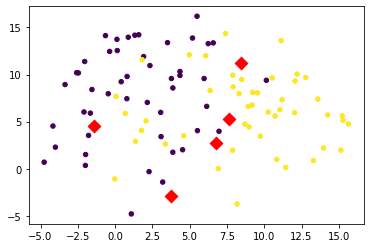

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.05, random_state=42)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=20)
plt.scatter(X_test[:,0], X_test[:,1], c="red", marker = "D", s=80)
plt.show()

In [26]:
k_value = 1
knn = KNeighborsClassifier(k_value)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

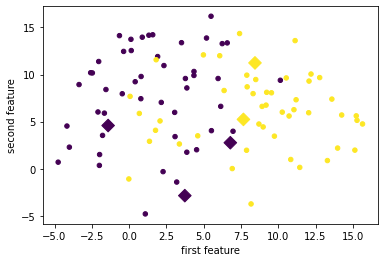

In [27]:
result = knn.predict(X_test)
marker = np.append(y_train, result, axis=0)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=20)
plt.scatter(X_test[:,0], X_test[:,1], c=result, marker = "D", s=80)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

In [28]:
print("Accuracy: {:.2f}".format(knn.score(X_test,y_test)))

Accuracy: 0.80


In [29]:
# Repeat with k = 7
k_value = 7
knn = KNeighborsClassifier(k_value)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

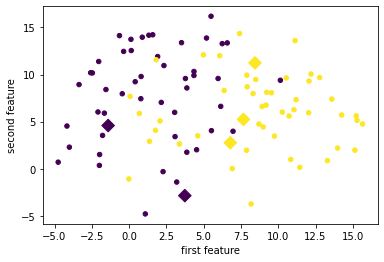

In [30]:
result = knn.predict(X_test)
marker = np.append(y_train, result, axis=0)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=20)
plt.scatter(X_test[:,0], X_test[:,1], c=result, marker = "D", s=80)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

In [31]:
print("Accuracy: {:.2f}".format(knn.score(X_test,y_test)))

Accuracy: 1.00


In [32]:
# Plot the decision boundary
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA', '#AAAAFF'])
x_min,x_max = X[:,0].min()-1, X[:,0].max()+1
y_min,y_max = X[:,0].min()-1, X[:,0].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max, 0.02),
np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])

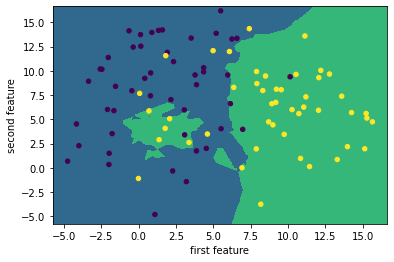

In [33]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx,yy,Z,shading='nearest', vmin=Z.min()-1, vmax=Z.max()+1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=20)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()